In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt

from config import DATA_DIR

In [2]:
# Load the data
df = pd.read_csv(os.path.join(DATA_DIR, 'sample_contributions.csv'))

df.head()

/tmp/ipykernel_6992/3386268877.py:2: DtypeWarning: Columns (37,39,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR, 'sample_contributions.csv'))


,cycle,transaction.id,transaction.type,amount,date,bonica.cid,contributor.name,contributor.lname,contributor.fname,contributor.mname,...,efec.memo,efec.memo2,efec.transaction.id.orig,bk.ref.transaction.id,efec.org.orig,efec.comid.orig,efec.form.type,excluded.from.scaling,contributor.cfscore,candidate.cfscore
0,1980,comm:1980:100016,24K,16.0,1979-08-19,100031605.0,ATLANTIC RICHFIELD COMPANY CONCERNED CITIZENS ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.55,-0.57
1,1980,comm:1980:100049,24K,225.0,1979-11-19,100031605.0,ATLANTIC RICHFIELD COMPANY CONCERNED CITIZENS ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.55,0.89
2,1980,comm:1980:10013,24K,1000.0,1980-08-19,100031424.0,AMERICAN BANKERS ASSOCIATION BANKPAC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.42,1.01
3,1980,comm:1980:100186,24K,1000.0,1980-08-19,100046721.0,"EMPAC EMPLOYEES POLITICAL ACTION COMMITTEE, CE...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.99,1.12
4,1980,comm:1980:100208,24K,500.0,1979-08-19,100031441.0,DEMOCRATIC REPUBLICAN INDEPENDENT VOTER EDUCAT...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.55,0.79


It looks like some of the contributions are not from individuals. For the purpose of this project, we'll only do analysis on individual contributors, which we'll consider to be people with a first and last name.

We should also process bonica.cid as a string, date as a date, etc.

In [3]:
# Process the id column
df['bonica.cid'] = df['bonica.cid'].astype(float).round(0).astype(int)

# Process the date column, eliminating rows with missing dates
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Eliminate records without a first and last name
df = df[~df['contributor.fname'].isnull()]
df = df[~df['contributor.lname'].isnull()]

In [4]:
df.head()

,cycle,transaction.id,transaction.type,amount,date,bonica.cid,contributor.name,contributor.lname,contributor.fname,contributor.mname,...,efec.memo,efec.memo2,efec.transaction.id.orig,bk.ref.transaction.id,efec.org.orig,efec.comid.orig,efec.form.type,excluded.from.scaling,contributor.cfscore,candidate.cfscore
1253,1980,indv:1980:100042,24T,60.0,1980-07-28,2598832357,"paton, cumming",paton,cumming,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.01,1.02
1254,1980,indv:1980:100093,15,500.0,1979-07-17,2378710126,"graham, robin",graham,robin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.47,1.40
1255,1980,indv:1980:100148,22Y,-20.0,1980-07-12,4626039966,"johnston, david r",johnston,david,r,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.51,1.40
1256,1980,indv:1980:100229,15,200.0,1979-01-05,2240627482,"peddie, rodman s",peddie,rodman,s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.87,1.29
1257,1980,indv:1980:100282,15,120.0,1979-07-03,2898966708,"aldridge, r g",aldridge,r,g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.36,1.29


In [5]:
# What's the minimum and maximum date?
print(df['date'].min(), df['date'].max())

# Eliminate all dates after 2000 or before 1980
df = df[df['date'] >= '1980-01-01']
df = df[df['date'] <= '2000-12-31']

print(df['date'].min(), df['date'].max())

1972-04-05 00:00:00 2094-11-09 00:00:00
1980-01-01 00:00:00 2000-06-01 00:00:00


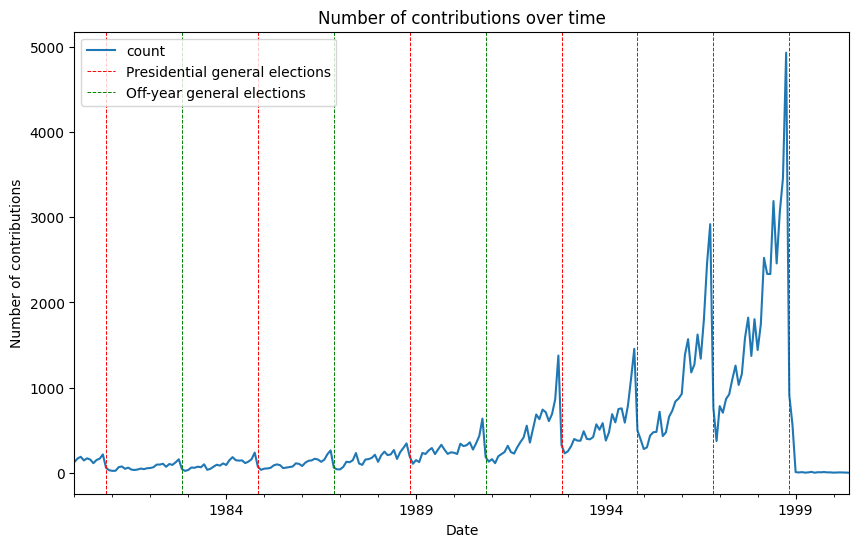

In [6]:
# Plot the number of contributions over time, grouping by month
plt.figure(figsize=(10, 6))
grouped = df['date'].dt.to_period('M').value_counts().sort_index()
grouped.plot()

# Add vertical dashed lines at the major general election dates
plt.axvline('1980-11-04', color='r', linestyle='--', linewidth=0.7, label='Presidential general elections')
plt.axvline('1982-11-02', color='g', linestyle='--', linewidth=0.7, label='Off-year general elections')
plt.axvline('1984-11-06', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1986-11-04', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1988-11-08', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1990-11-06', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1992-11-03', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1994-11-08', color='g', linestyle='--', linewidth=0.7)
plt.axvline('1996-11-05', color='r', linestyle='--', linewidth=0.7)
plt.axvline('1998-11-03', color='g', linestyle='--', linewidth=0.7)

plt.xlabel('Date')
plt.ylabel('Number of contributions')
plt.title('Number of contributions over time')
plt.legend(loc='upper left')
plt.show()

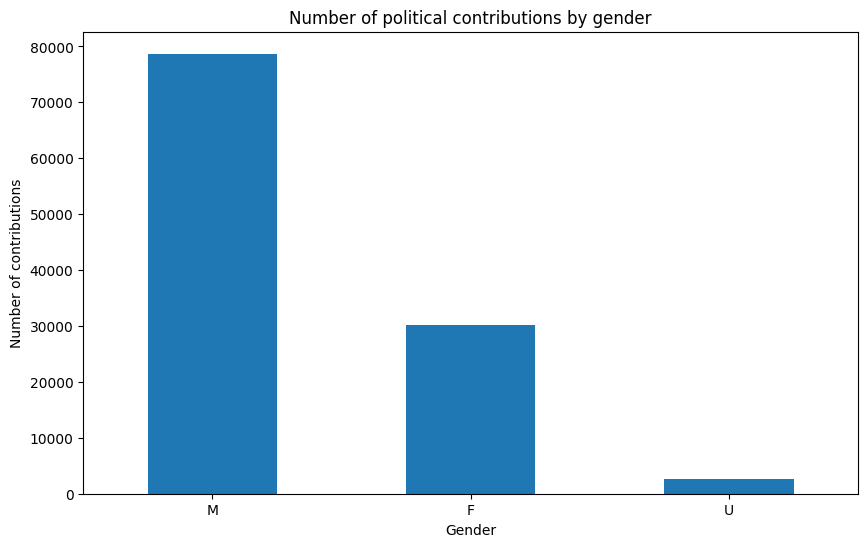

In [7]:
plt.figure(figsize=(10, 6))
df['contributor.gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of contributions')
plt.title('Number of political contributions by gender')
plt.xticks(rotation=0)
plt.show()


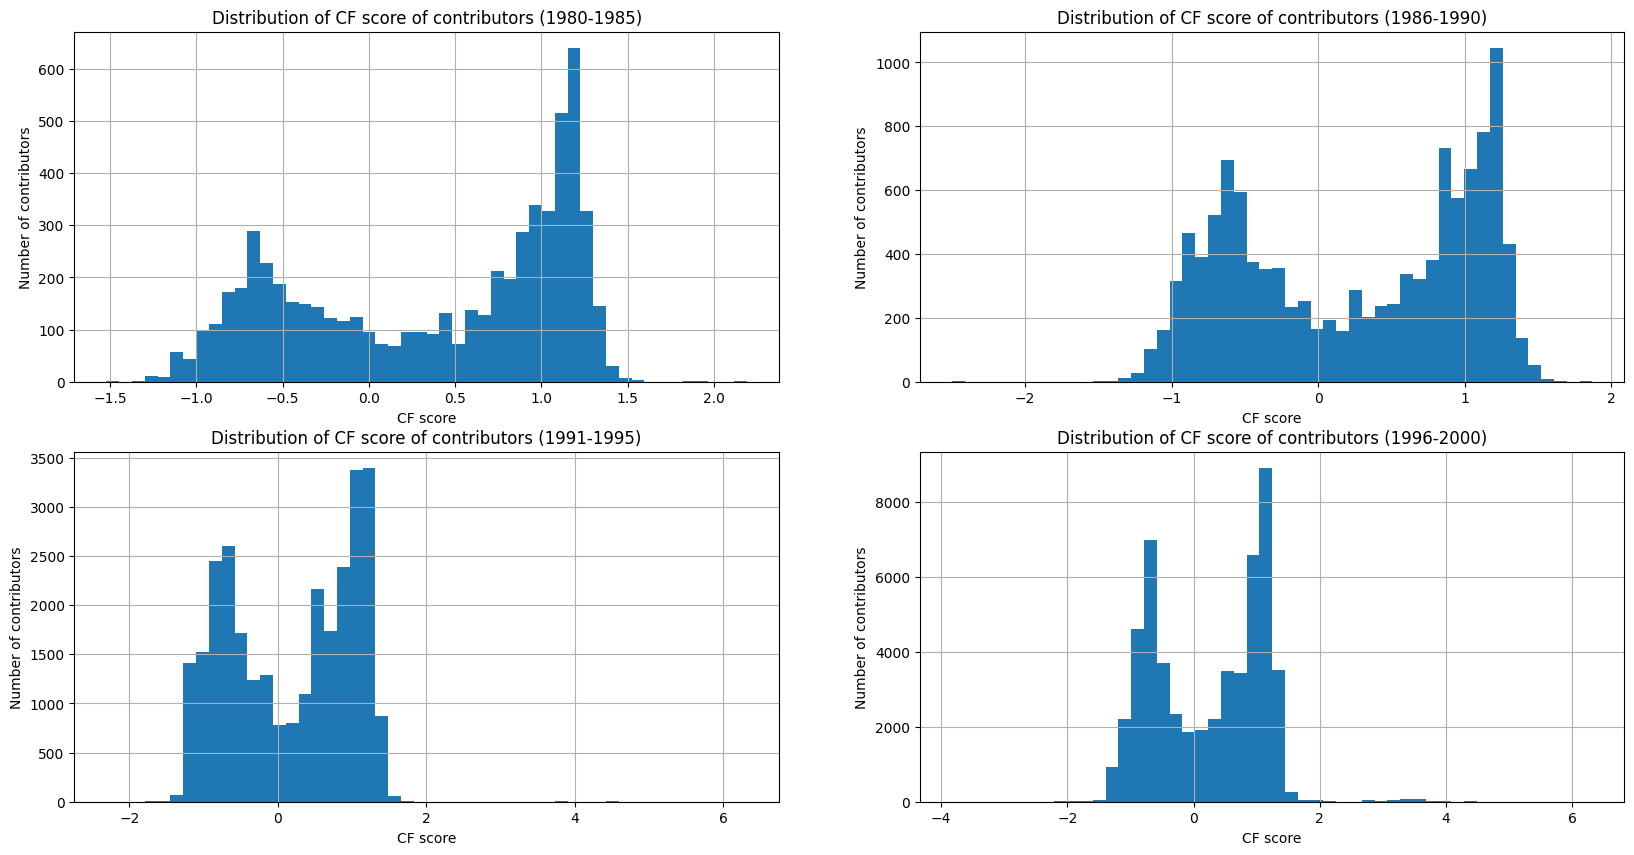

In [8]:
# Split the time period into four equal intervals
time_periods = ['1980-1985', '1986-1990', '1991-1995', '1996-2000']

# Plot the distribution of CF score of contributors over time
plt.subplots(2, 2, figsize=(20, 10))
for i, period in enumerate(time_periods):
    plt.subplot(2, 2, i + 1)
    df[df['date'].dt.year.between(int(period[:4]), int(period[-4:]))]['contributor.cfscore'].hist(bins=50)
    # plt.xlim(-2, 2)
    plt.xlabel('CF score')
    plt.ylabel('Number of contributors')
    plt.title(f'Distribution of CF score of contributors ({period})')


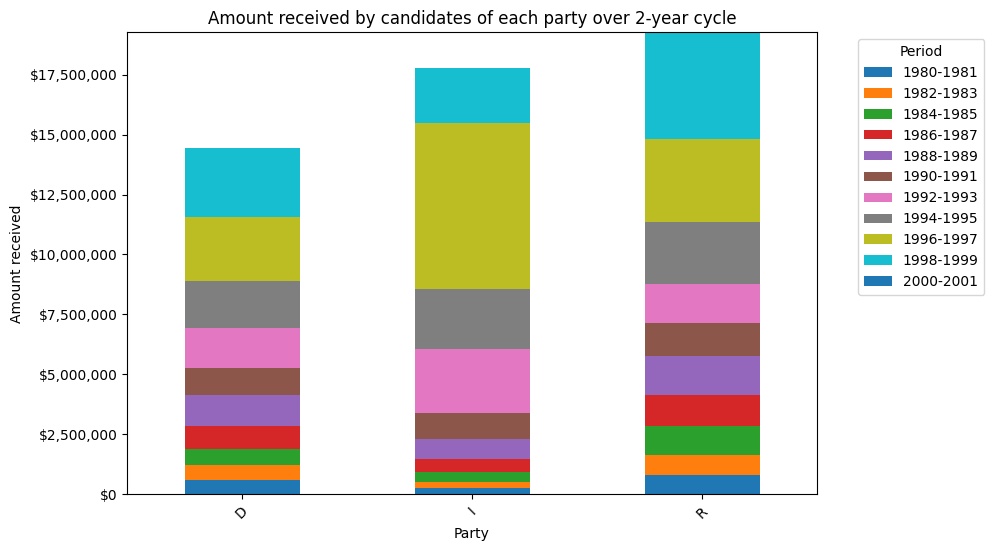

In [9]:
import matplotlib.ticker as ticker
# Number of dollars received by candidates of each party over time

# Just for this graph, group non-major parties together (100 = D, 200 = R, all else = I)
df_party = df.copy()

def party(x):
    try:
        if int(x) == 100:
            return 'D'
        elif int(x) == 200:
            return 'R'
        else:
            return 'I'
    except ValueError:
        return 'I'
    

df_party['recipient.party'] = df_party['recipient.party'].apply(party)

# Calculate periods
min_year = df_party['date'].dt.year.min()
df_party['period'] = ((df_party['date'].dt.year - min_year) / 2).astype(int)

# Create a label for each period that shows the start and end year
def period_label(row):
    start_year = min_year + row['period'] * 2
    return f'{start_year}-{start_year + 1}'

df_party['period_label'] = df_party.apply(period_label, axis=1)

# Group by party and period_label, then sum amounts
grouped = df_party.groupby(['recipient.party', 'period_label'])['amount'].sum().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adjustments and formatting
plt.subplots_adjust(right=0.7)
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left', labels=grouped.columns)
plt.xlabel('Party')
plt.ylabel('Amount received')
plt.title('Amount received by candidates of each party over 2-year cycle')
plt.xticks(rotation=45) # Rotate labels to fit them better

# Money formatter
def money_formatter(x, pos):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(money_formatter))

plt.show()

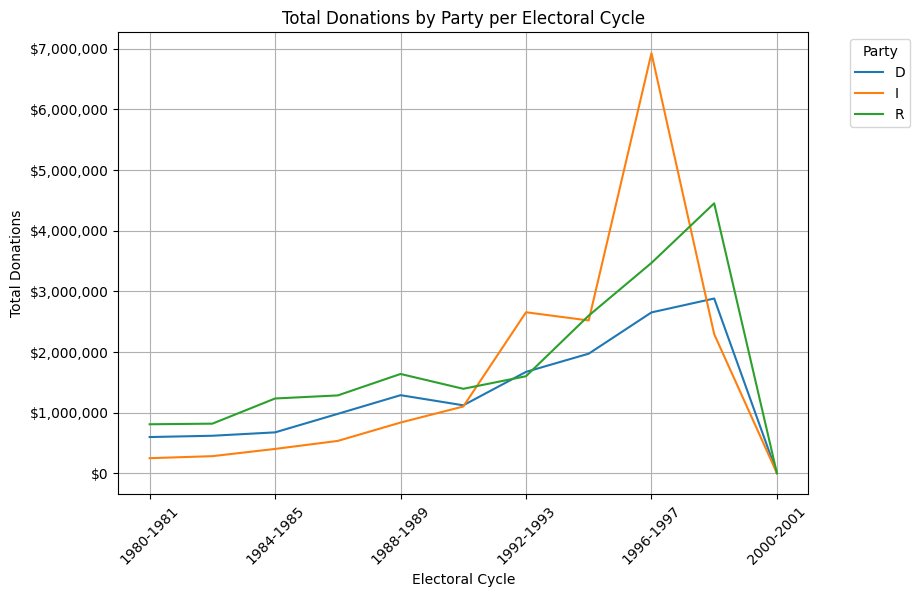

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Assuming df is your DataFrame and is already defined
# The following code builds upon the preparation you've done

# Your existing data preparation code
df_party = df.copy()
df_party['recipient.party'] = df_party['recipient.party'].apply(party)

min_year = df_party['date'].dt.year.min()
df_party['period'] = ((df_party['date'].dt.year - min_year) / 2).astype(int)
df_party['period_label'] = df_party.apply(period_label, axis=1)

grouped = df_party.groupby(['recipient.party', 'period_label'])['amount'].sum().unstack(fill_value=0).T

# Plotting - Use 'plot' instead of 'bar'
fig, ax = plt.subplots(figsize=(12, 6))
grouped.plot(kind='line', ax=ax)  # Plot each party as a line

# Adjustments and formatting
plt.subplots_adjust(right=0.7)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Electoral Cycle')
plt.ylabel('Total Donations')
plt.title('Total Donations by Party per Electoral Cycle')
plt.xticks(rotation=45)  # Rotate labels to fit them better

# Use custom formatter for the y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(money_formatter))

plt.grid(True)  # Add grid for better readability
plt.show()
